In [25]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from gtda.plotting import plot_point_cloud, plot_diagram
from gtda.diagrams import PersistenceLandscape

from data.coupled_double_pendulum import generate_coupled_pendulum
from data.unucoupled_double_pendulum import generate_uncoupled_pendulum
from src.tda.takens_embedding import takens_embedding
from src.tda.compute_pd import compute_pd
from src.tda.compute_pl import compute_pl
from src.ml.SVM_PCA import test_on_svm

In [12]:
def plot_time_series(theta, phi, title):
    t = np.arange(len(theta))
    plt.figure(figsize=(8, 3))
    plt.plot(t, theta, label=r"$\theta$")
    plt.plot(t, phi, label=r"$\phi$")
    plt.legend()
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [13]:
# -----------------------------
# Generate datasets
# -----------------------------
N = 5
combined_c, theta_c, phi_c = generate_coupled_pendulum(N=N, T=15, spacing=20)[0:3]
combined_u, theta_u, phi_u = generate_uncoupled_pendulum(N=N, T= 15, spacing=20)[0:3]

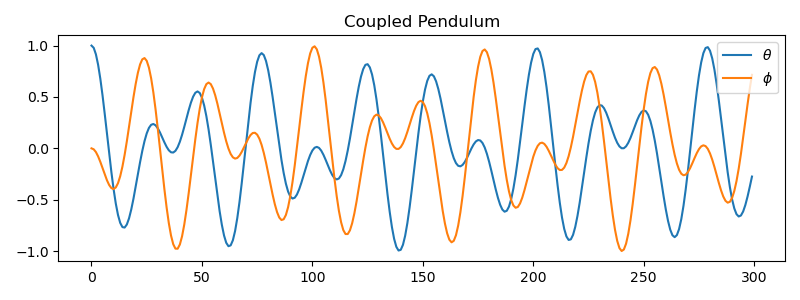

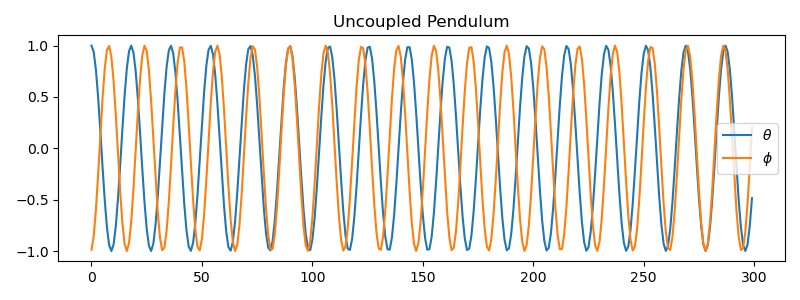

In [14]:
plot_time_series(theta_c[2], phi_c[2], "Coupled Pendulum")
plot_time_series(theta_u[2], phi_u[2], "Uncoupled Pendulum")

In [15]:
X_c = takens_embedding(combined_c, N, 6)
X_u = takens_embedding(combined_u, N, 6)

In [16]:
X_c_a = np.array(X_c[2])
pca = PCA(n_components=3)
X_c_a_pca = pca.fit_transform(X_c_a)

X_u_a = np.array(X_u[2])
pca = PCA(n_components=3)
X_u_a_pca = pca.fit_transform(X_u_a)

In [ ]:
# 3D plot of the PCA-reduced Takens embedding of the Coupled Pendulum
plot_point_cloud(X_c_a_pca, dimension=3)

In [ ]:
# 3D plot for the Uncoupled Pendulum
plot_point_cloud(X_u_a_pca, dimension=3)

In [19]:
# -----------------------------
# Persistence diagrams
# -----------------------------
dgms_c = compute_pd(X_c)
dgms_u = compute_pd(X_u)

In [ ]:
# Persistence diagram for Coupled Pendulum
plot_diagram(dgms_c[2])

In [ ]:
# Persistence diagram for Uncoupled Pendulum
plot_diagram(dgms_u[2])

Although it's hard to classify the data by looking at the embeddings, their topological summary exhibit distinct behaviors that can be easily identified. 

In [ ]:
# -----------------------------
# Persistence landscapes
# -----------------------------

v_c = compute_pl(dgms_c)
v_u = compute_pl(dgms_u)

Persistence Landscapes are functions on the plane. I flatten them into vectors in compute_pl. To visualize the persistence landscapes as functions, run the next 2 blocks of codes.

In [26]:
pl = PersistenceLandscape(n_layers=15, n_bins=50)
sample_idx = 2
chosen_diagram = dgms_c[sample_idx:sample_idx+1] # Keeps the 3D shape (1, n_points, 3)

fig = pl.fit_transform_plot(chosen_diagram)

In [27]:
pl = PersistenceLandscape(n_layers=15, n_bins=50)
sample_idx = 2
chosen_diagram = dgms_u[sample_idx:sample_idx+1] # Keeps the 3D shape (1, n_points, 3)

fig = pl.fit_transform_plot(chosen_diagram)

In [29]:
# -----------------------------
# Build dataset
# -----------------------------
X = np.vstack([v_c, v_u])
y = np.array([1] * len(v_c) + [0] * len(v_u))

Dataset shape: (10, 1500), Labels shape: (10,)
Average CV Accuracy: 1.00
Test Accuracy: 1.00


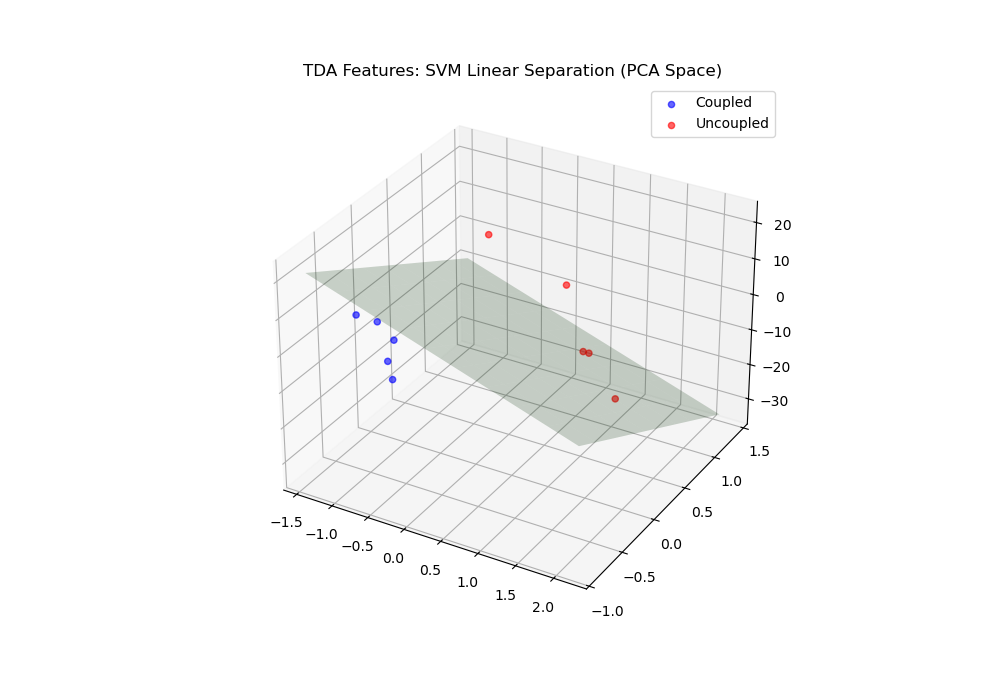

(1.0, array([1., 1., 1., 1., 1.]))

In [30]:
# -----------------------------
# 6. PCA + SVM
# -----------------------------

test_on_svm(v_c, v_u)